### Análisis Exploratorio de Datos (EDA)

Con el dataset ya limpio y normalizado, se procede a realizar el **Análisis Exploratorio de Datos (EDA)**.  
El objetivo es comprender la distribución de las variables, el balance de clases, y las relaciones más relevantes entre las características y la variable objetivo **Churn**.

Las secciones a desarrollar son:
1. Balance de clases (Churn)
2. Análisis de variables categóricas
3. Porcentaje de adultos mayores (Senior Citizens) que se retiran
4. Análisis de Satisfaction Score frente a Churn
5. Correlación entre variables numéricas


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargar el dataset

df = pd.read_csv("../data/Telecom_Customer_Churn_Complete.csv")

## Graficas para realizar el analisis

### Grafico de barras de la variable objetivo

C:\Users\Yeison\AppData\Local\Temp\ipykernel_6180\1160939259.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette="Reds")


Tasa de Churn (%):
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


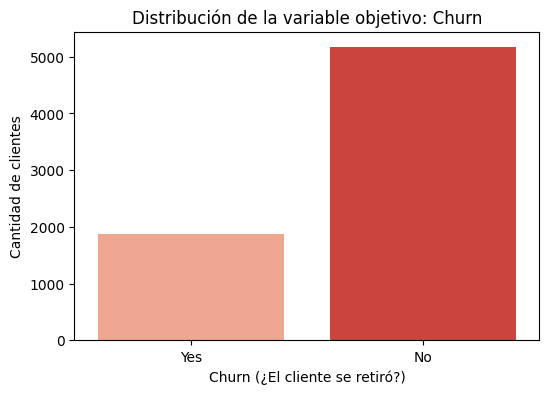

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn", palette="Reds")
plt.title("Distribución de la variable objetivo: Churn")
plt.xlabel("Churn (¿El cliente se retiró?)")
plt.ylabel("Cantidad de clientes")

churn_rate = df["Churn"].value_counts(normalize=True) * 100
print("Tasa de Churn (%):")
print(churn_rate.round(2))


Como se puede evidenciar en el grafico de la variable objetivo hay un numero mucho mayor de personas que no se retiraron de aquellos que si lo hicieron, lo que implica un desbalance en el dataset. Cuando se vaya a construir el modelo. Se deben realizar tecnicas que permitan corregir esto.

### Analisis de variables categoricas

Se realiza un analisis de las variables categoricas: Gender, Senior Citizen, Internet Service y Contract

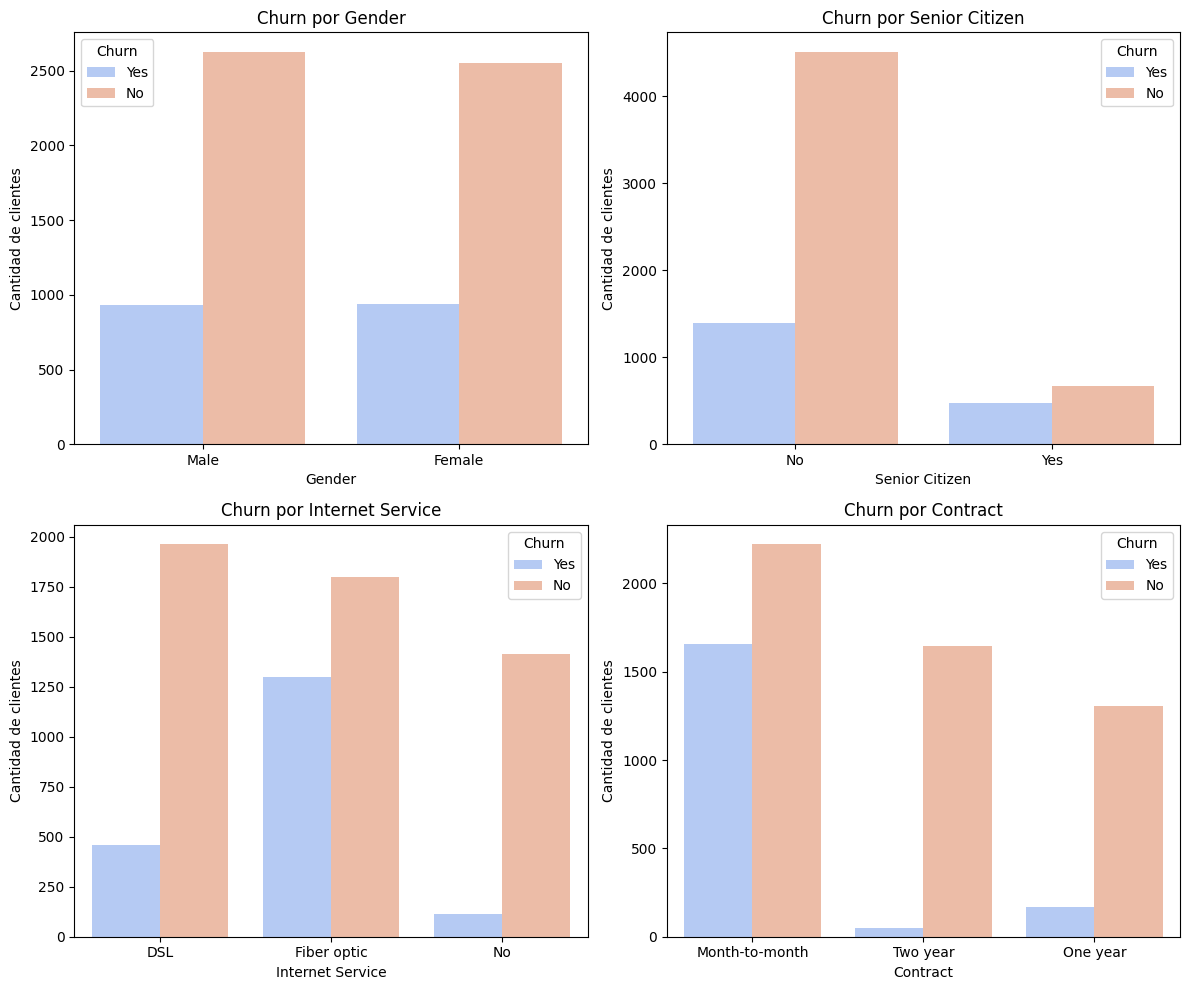

In [4]:
cat_vars = ["Gender", "Senior Citizen", "Internet Service", "Contract"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, var in enumerate(cat_vars):
    sns.countplot(data=df, x=var, hue="Churn", palette="coolwarm", ax=axes[i])
    axes[i].set_title(f"Churn por {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Cantidad de clientes")

plt.tight_layout()
plt.show()


En las graficas mostradas, aparece la relacion entre las variables categoricas mencionadas anteriormente y la variable objetivo.
Se puede evidenciar que hombres y mujeres tienen una tasa de retiro similar. Tambien se puede observar que aquellos que tienen el servivicio de fibra optica se retiran con mas frecuencia que quienes no tienen dicho servicio. Tambien se evidencia una proporcion alta de desercion en clientes con contratos mensuales.

### Analisis de ciudadanos mayores y desercion

Se analizara si existe alguna relación entre estas dos variables.

Porcentaje de clientes retirados según condición de Senior Citizen (%):
Churn              No    Yes
Senior Citizen              
No              76.39  23.61
Yes             58.32  41.68


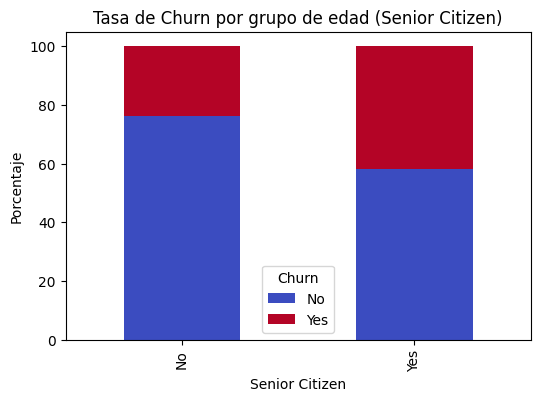

In [5]:
senior_churn = df.groupby("Senior Citizen")["Churn"].value_counts(normalize=True).unstack() * 100
print("Porcentaje de clientes retirados según condición de Senior Citizen (%):")
print(senior_churn.round(2))

senior_churn.plot(kind="bar", stacked=True, figsize=(6,4), colormap="coolwarm")
plt.title("Tasa de Churn por grupo de edad (Senior Citizen)")
plt.ylabel("Porcentaje")
plt.show()


Se puede observar que los adultos mayores suelen tener una mayor tendencia a retirar sus servicios que aquellos que no lo son.

### Relacion entre satisfaction score y churn

C:\Users\Yeison\AppData\Local\Temp\ipykernel_6180\912296253.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y="Satisfaction Score", palette="coolwarm")


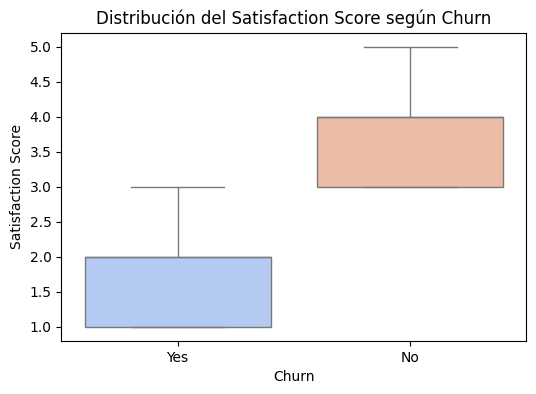

Promedio de Satisfaction Score por estado de Churn:
Churn
No     3.79
Yes    1.74
Name: Satisfaction Score, dtype: float64


In [6]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Churn", y="Satisfaction Score", palette="coolwarm")
plt.title("Distribución del Satisfaction Score según Churn")
plt.xlabel("Churn")
plt.ylabel("Satisfaction Score")
plt.show()

mean_satisfaction = df.groupby("Churn")["Satisfaction Score"].mean().round(2)
print("Promedio de Satisfaction Score por estado de Churn:")
print(mean_satisfaction)


Se puede evidenciar que aquellos que cancelaron sus servicios tienen un promedio de satisfaccion mucho menor que aquellos con un puntaje mayor.

### Matriz de correlacion

Se muestra a continuacion la matriz de correlacion de las variables numericas.

Matriz de correlación entre variables numéricas:
                                   Zip Code  Monthly Charges  Total Charges  \
Zip Code                               1.00            -0.00          -0.00   
Monthly Charges                       -0.00             1.00           0.65   
Total Charges                         -0.00             0.65           1.00   
Churn Score                           -0.00             0.13          -0.12   
CLTV                                  -0.00             0.10           0.34   
Tenure                                 0.00             0.25           0.83   
Age                                   -0.00             0.14           0.06   
Number of Dependents                   0.01            -0.13           0.02   
Population                            -0.41            -0.01          -0.00   
Number of Referrals                   -0.01             0.03           0.25   
Avg Monthly Long Distance Charges      0.01             0.14           0.07   
Avg

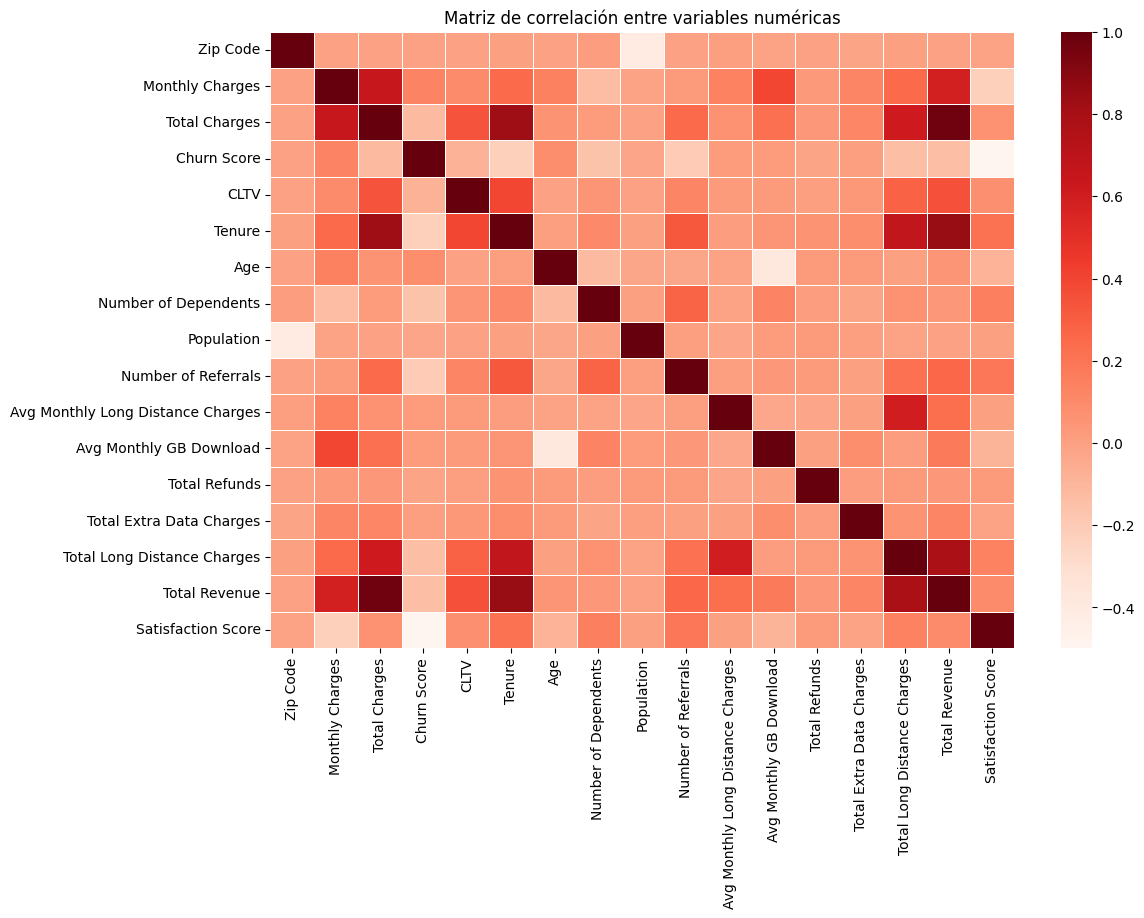

In [7]:
numeric_cols = df.select_dtypes(include=["number"]).columns
corr_matrix = df[numeric_cols].corr()

print("Matriz de correlación entre variables numéricas:")
print(corr_matrix.round(2))

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap="Reds", linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


Hay Variables con alta correlacion que podrian eliminarse. Ejemplo de esto son Total Charges y Total Revenue, Tenure y Total Revenue, Total long distance charges y Total revenues, Monthly Charges y Total Revenue, Total charges y Total Long Distance Charges, Tenure y Total Long Distancess Charges, Avg Monthly Long Distance Charges y Total Long Distance Charges

In [ ]:
import numpy as np

# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include=np.number)

# Calcular la matriz de correlación
corr_matrix = numeric_df.corr().abs()

# Crear una máscara para evitar duplicar comparaciones
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Seleccionar columnas con correlación mayor a 0.9
high_corr = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

print("Variables altamente correlacionadas (r > 0.9):")
print(high_corr)


📊 Variables altamente correlacionadas (r > 0.9):
['Total Revenue']


Como se puede ver, la variable Total revenue no aporta mucho para el analisis pues otras variables ya tienen informacion que esta tiene, por lo tanto esta puede eliminarse.

In [9]:
# Eliminar variable altamente correlacionada
cols_to_drop = ["Total Revenue"]

existing_cols = [col for col in cols_to_drop if col in df.columns]
df.drop(columns=existing_cols, inplace=True)
print(f"Columnas eliminadas por alta correlación: {existing_cols}")
print(f"Dataset actualizado: {df.shape[1]} columnas restantes.")


Columnas eliminadas por alta correlación: ['Total Revenue']
Dataset actualizado: 43 columnas restantes.


## Codificacion y normalizacion de nombres.

En este momento se aplicara One-Hot-Encoding para codificar las variables binarias. Y se normalizaran los nombres de variables para evitar errores al usar los modelos.

In [ ]:
# Establecer índice e identificación clara

if "Customer ID" in df.columns:
    df.set_index("Customer ID", inplace=True)
    df.index.name = "Customer_ID"  # Normalizar nombre del índice

# Codificación de variables categóricas

# Codificar 'Gender' de forma ordinal
if "Gender" in df.columns:
    df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

# Identificar variables categóricas (excluyendo la variable objetivo)
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
cat_cols = [col for col in cat_cols if col.lower() not in ["churn"]]

print(f"Variables categóricas identificadas ({len(cat_cols)}):")
print(cat_cols)

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)

print(f"\n Dataset codificado: {df_encoded.shape[1]} columnas finales")

# Limpieza de nombres de columnas

def clean_column_names(col):
    col = col.replace(" ", "_")
    col = col.replace("(", "_")
    col = col.replace(")", "")
    col = col.replace("]", "_")
    col = col.replace(",", "")
    return col

df_encoded.columns = [clean_column_names(c) for c in df_encoded.columns]

# Verificación final

# Verificar columnas duplicadas
duplicadas = df_encoded.columns[df_encoded.columns.duplicated()].tolist()

print(f"\nColumnas duplicadas tras limpieza: {duplicadas if duplicadas else 'Ninguna'}")
print(f"Total de columnas finales: {df_encoded.shape[1]}")
print(f"Filas: {df_encoded.shape[0]}")

# Mostrar las primeras columnas como muestra
print("\nPrimeras columnas después de la limpieza:")
print(df_encoded.columns[:15])



Variables categóricas identificadas (25):
['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Under 30', 'Married', 'Referred a Friend', 'Offer', 'Internet Type', 'Device Protection Plan', 'Premium Tech Support', 'Streaming Music', 'Unlimited Data', 'Tenure Group']

✅ Dataset codificado: 56 columnas finales

Columnas duplicadas tras limpieza: Ninguna
Total de columnas finales: 56
Filas: 7043

Primeras columnas después de la limpieza:
Index(['Zip_Code', 'Gender', 'Monthly_Charges', 'Total_Charges', 'Churn_Score',
       'CLTV', 'Tenure', 'Churn', 'Age', 'Number_of_Dependents', 'Population',
       'Number_of_Referrals', 'Avg_Monthly_Long_Distance_Charges',
       'Avg_Monthly_GB_Download', 'Total_Refunds'],
      dtype='object')


In [11]:
print("Variables categoricas despues de la limpieza: ")
cat_cols = df_encoded.select_dtypes(include=["object"]).columns.tolist()
cat_cols = [col for col in cat_cols if col.lower() not in ["churn"]]
print(cat_cols)


Variables categoricas despues de la limpieza: 
[]


In [12]:
df_encoded.head()

,Zip_Code,Gender,Monthly_Charges,Total_Charges,Churn_Score,CLTV,Tenure,Churn,Age,Number_of_Dependents,...,Internet_Type_Fiber_Optic,Internet_Type_No_Internet_Service,Device_Protection_Plan_Yes,Premium_Tech_Support_Yes,Streaming_Music_Yes,Unlimited_Data_Yes,Tenure_Group_12-24_Months,Tenure_Group_24-48_Months,Tenure_Group_48-60_Months,Tenure_Group_>_60_Months
0,90003,1,53.85,108.15,86,3239,2,Yes,37,0,...,0,0,0,0,0,1,0,0,0,0
1,90005,0,70.70,151.65,67,2701,2,Yes,19,2,...,1,0,0,0,0,1,0,0,0,0
2,90006,0,99.65,820.50,86,5372,8,Yes,31,2,...,0,0,1,0,1,1,0,0,0,0
3,90010,0,104.80,3046.05,84,5003,28,Yes,23,3,...,1,0,1,1,1,1,0,1,0,0
4,90015,1,103.70,5036.30,89,5340,49,Yes,38,1,...,1,0,1,0,1,1,0,0,1,0


In [ ]:
OUTPUT_PATH = "../data/Telecom_Customer_Churn_Complete.csv"

df_encoded.to_csv(OUTPUT_PATH, index=False)

print(f" Archivo final guardado en: {OUTPUT_PATH}")

✅ Archivo final guardado en: ../data/Telecom_Customer_Churn_Complete.csv


### Preparación final del dataset para modelado

En esta etapa se realizaron las siguientes transformaciones:

1. **Definición del índice:**
   - Se estableció la columna `Customer ID` como índice principal del dataset y se renombró a `Customer_ID` para mayor claridad.

2. **Codificación de variables categóricas:**
   - La columna `Gender` se transformó de forma ordinal (`Male → 1`, `Female → 0`).
   - Al resto de las variables categóricas se les aplicó **One-Hot Encoding** mediante `pd.get_dummies()`, eliminando una categoría base (`drop_first=True`) para evitar colinealidad.

3. **Normalización de nombres de columnas:**
   - Se reemplazaron espacios en blanco por guiones bajos (_).
   - Se sustituyeron paréntesis, corchetes y comas para eliminar caracteres especiales.
   - Se verificó que no existieran columnas duplicadas tras la limpieza.

4. **Verificación final:**
   - Se comprobó que el número de filas permaneciera igual.
   - Se revisaron los nombres de las columnas para garantizar compatibilidad con librerías de modelado.

Estas transformaciones garantizan que el dataset esté listo para su uso en modelos de Machine Learning, evitando errores de sintaxis y problemas de codificación.
